In [48]:
# IMPORT NEEDED LIBRARIES 
import pandas as pd
import numpy as np
import warnings
import pmdarima as pm 
import math
from pmdarima import auto_arima
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from common.preprocessor import load_data
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [49]:
# load data from the preprocessor and set index to date column
data = pd.read_csv('Modified Data.csv', parse_dates=True, index_col=[0])

In [50]:
data.head() # display the first 5 rows of the data

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [51]:
data.describe() # display the summary statistics of the data

,Price
count,252.00
mean,69.46
std,28.03
min,19.96
25%,48.47
50%,65.47
75%,91.95
max,134.79


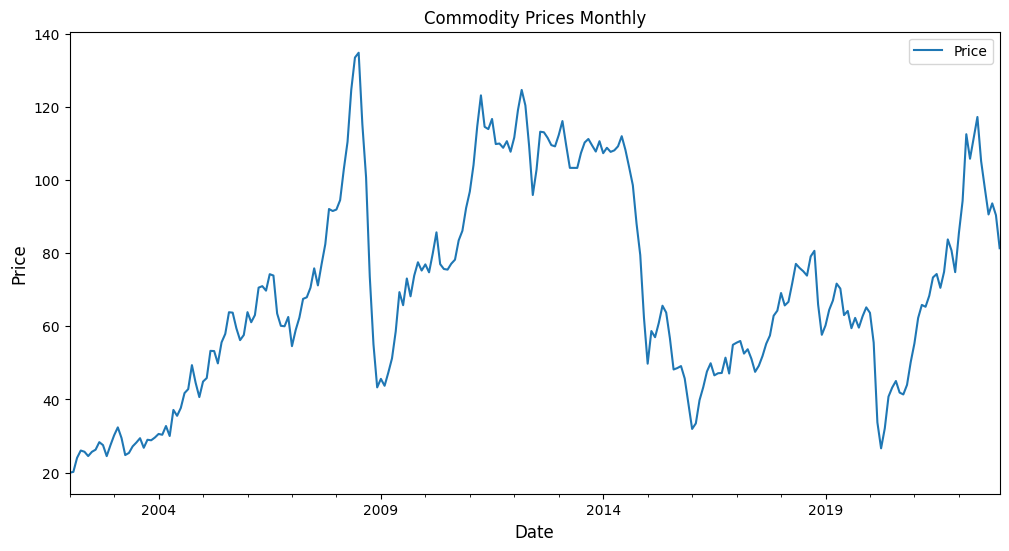

In [52]:
# visualize the data
data.plot(y='Price', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

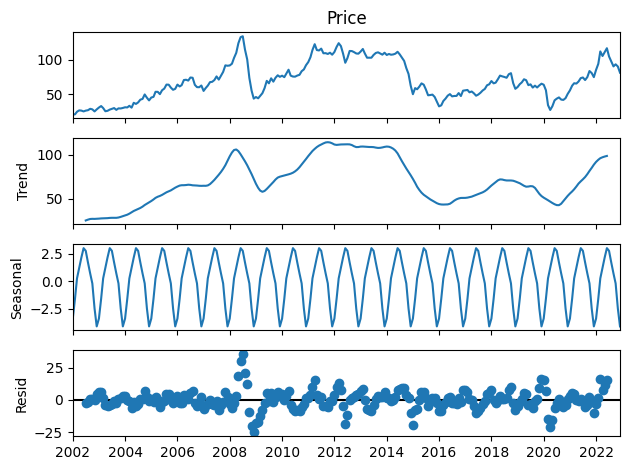

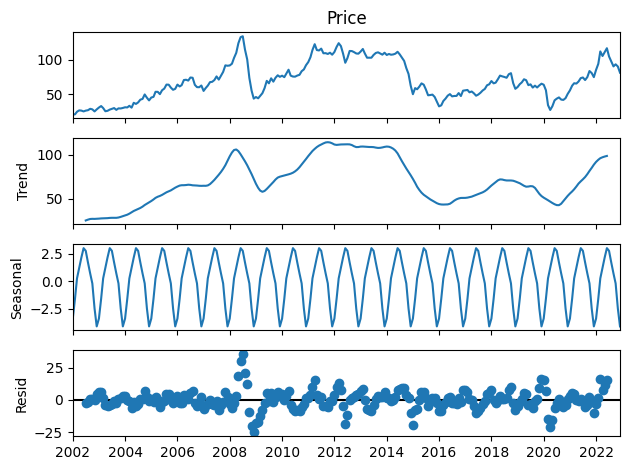

In [53]:
# visualize the components of the data
decomposition = seasonal_decompose(data["Price"], model="additive")  # "Price" is likely your column name for oil prices
decomposition.plot()  # Visualize the trend, seasonal component, and residuals

In [54]:
# # set the train and test data with start dates
# train_start_date = '2002-01-01'
# test_start_date = '2019-01-01'

In [55]:
# # visualize the train and test data
# data[(data.index < test_start_date) & (data.index >= train_start_date)][['Price']].rename(columns={'Price':'train'}) \
#     .join(data[test_start_date:][['Price']].rename(columns={'Price':'test'}), how='outer') \
#     .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
# plt.xlabel('timestamp', fontsize=12)
# plt.ylabel('Price', fontsize=12)
# plt.show()

In [56]:
# set the train and test data and print the dimensions of it
train = data.copy()[(data.index >= train_start_date) & (data.index < test_start_date)][['Price']]
test = data.copy()[data.index >= test_start_date][['Price']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

In [57]:
train

In [58]:
# test

In [13]:
# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(train['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -2.5026745232331122
p-value: 0.11482493982756942
Data may be non-stationary. Consider differencing.


In [14]:
# Identify number of differences required (if necessary)
n_diffs = pm.arima.ndiffs(train['Price'], test='adf')
print(f"\nNumber of differences required for scaled training data: {n_diffs}")



Number of differences required for scaled training data: 1


In [15]:
# Perform differencing if required
if n_diffs > 0:
    differenced_train = train.diff(n_diffs).dropna()
else:
    differenced_train = train.copy()

<Axes: >

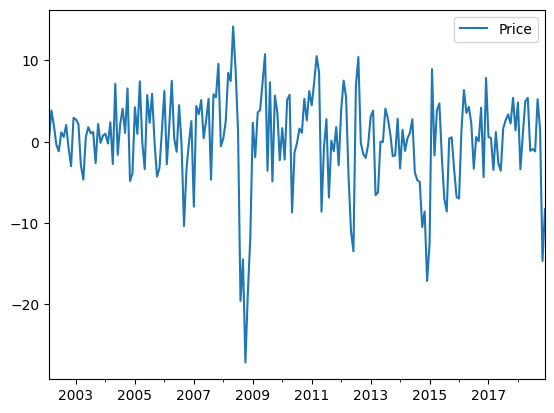

In [16]:
# plot differenced data
differenced_train.plot()

In [44]:
# check seasonal differencing
from pmdarima.arima.utils import nsdiffs

nsdiff= nsdiffs(train['Price'], m=12, test='ch')
print(f"Seasonal differences required: {nsdiff}")

Seasonal differences required: 0


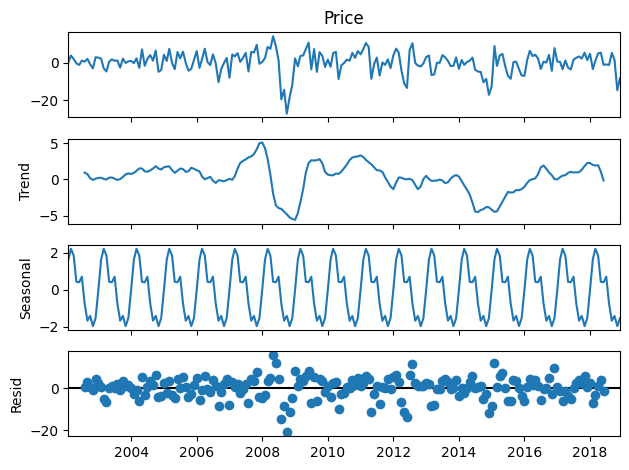

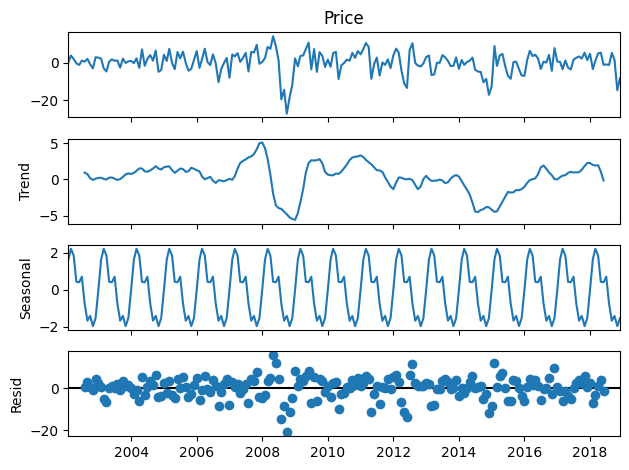

In [17]:
# visualize the components of the differenced data
decomposition = seasonal_decompose(differenced_train["Price"], model="additive")  # "Price" is likely your column name for oil prices
decomposition.plot()  # Visualize the trend, seasonal component, and residuals


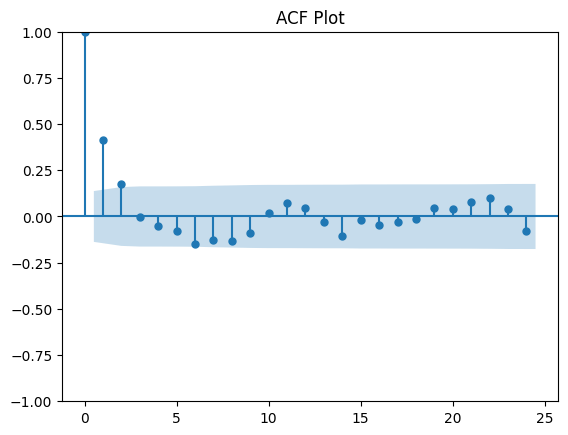

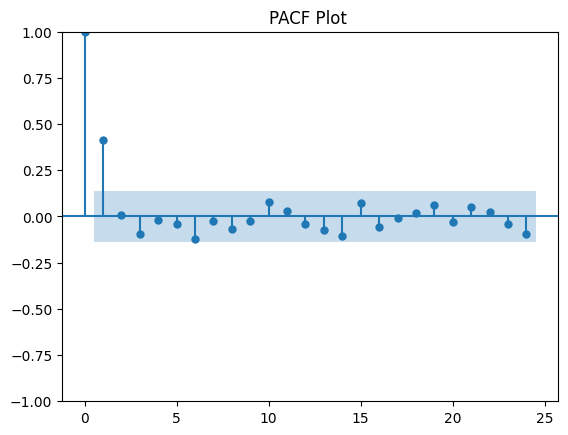

In [45]:
# ACF and PACF plots (optional) using lags of 60 (5 years)
plot_acf(differenced_train['Price'], title='ACF Plot')
plt.show()
plot_pacf(differenced_train['Price'], title='PACF Plot ')
plt.show()

In [46]:


df_2002 = data['2002']
df_2003 = data['2003']
df_2004 = data['2004']
df_2005 = data['2005']
df_2006 = data['2006']
df_2007 = data['2007']
# Create subplot figure
fig = make_subplots(rows=6, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=df_2002.index, y=df_2002['Price'], name='Price in 2002'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2003.index, y=df_2003['Price'], name='Price in 2003'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_2004.index, y=df_2004['Price'], name='Price in 2004'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_2005.index, y=df_2005['Price'], name='Price in 2005'), row=4, col=1)
fig.add_trace(go.Scatter(x=df_2006.index, y=df_2006['Price'], name='Price in 2006'), row=5, col=1)
fig.add_trace(go.Scatter(x=df_2007.index, y=df_2007['Price'], name='Price in 2007'), row=6, col=1)


# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_xaxes(title_text="Date", row=5, col=1)
fig.update_xaxes(title_text="Date", row=6, col=1)




# Update yaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Price", row=2, col=1)
fig.update_yaxes(title_text="Price", row=3, col=1)
fig.update_yaxes(title_text="Price", row=4, col=1)
fig.update_yaxes(title_text="Price", row=5, col=1)
fig.update_yaxes(title_text="Price", row=6, col=1)


# Update layout
fig.update_layout(height=1000, width=1200, title_text="Price from 2002 to 2007")

fig.show()

In [20]:
# Check for stationarity on differenced data with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(differenced_train['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -9.015794676260294
p-value: 5.9556970044840115e-15
Data is likely stationary.


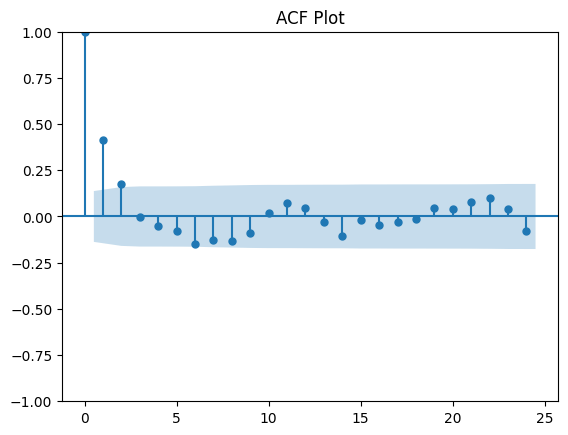

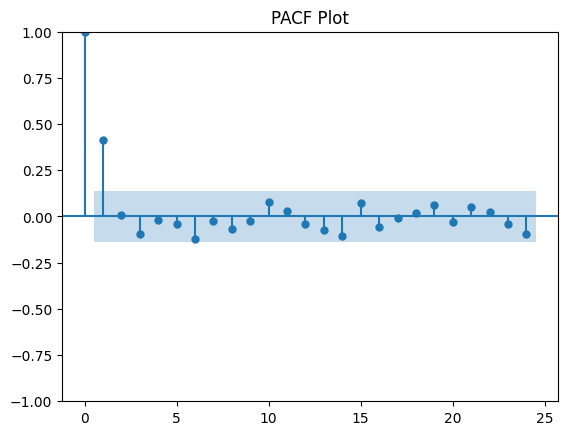

In [47]:
# ACF and PACF plots on differenced data
plot_acf(differenced_train['Price'], title='ACF Plot')
plt.show()
plot_pacf(differenced_train['Price'], title='PACF Plot')
plt.show()

In [22]:
# Use auto_arima to find best parameters
model = auto_arima(differenced_train['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                  start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
                  error_action='ignore', suppress_warnings=True,
                  stepwise=True)
print(f"\nAuto ARIMA identified parameters: {model.order}, {model.seasonal_order}")
# decide tradeoff between time and aic

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1342.381, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1281.283, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1340.404, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1308.779, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1255.622, Time=1.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1288.130, Time=1.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1257.341, Time=1.34 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1257.435, Time=1.75 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1263.110, Time=1.55 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=1258.579, Time=2.44 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

In [23]:
# other information criteria
model = auto_arima(differenced_train['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                  start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
                  error_action='ignore', suppress_warnings=True,
                  stepwise=True, information_criterion='bic')
print(f"\nAuto ARIMA identified parameters: {model.order}, {model.seasonal_order}")
# decide tradeoff between time and aic

In [24]:
# # other information criteria
# model = auto_arima(differenced_train['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
#                   start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
#                   error_action='ignore', suppress_warnings=True,
#                   stepwise=True, information_criterion='hqic')
# print(f"\nAuto ARIMA identified parameters: {model.order}, {model.seasonal_order}")
# # decide tradeoff between time and aic

In [25]:
print(f'model order: {model.order}, \nmodel seasonal order: {model.seasonal_order}')

model order: (1, 0, 0), 
model seasonal order: (2, 1, 0, 12)


In [26]:
# Fit the SARIMA model on the differenced training data
model = SARIMAX(endog=differenced_train, order=model.order, seasonal_order=model.seasonal_order, freq="MS")
results = model.fit(disp=0)  # Suppress convergence output
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  203
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -622.817
Date:                            Tue, 02 Apr 2024   AIC                           1253.635
Time:                                    16:16:13   BIC                           1266.644
Sample:                                02-01-2002   HQIC                          1258.904
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4100      0.056      7.335      0.000       0.300       0.520
ar.S.L12      -0.5252      0.058   

In [27]:
train.shape

(204, 1)

In [28]:
test.shape

(48, 1)

In [29]:
HORIZON = 3
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted['Price+'+str(t)] = test_shifted['Price'].shift(-t, freq='MS')

test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Price,Price+1,Price+2
2019-01-01,60.23,64.50,67.05
2019-02-01,64.50,67.05,71.66
2019-03-01,67.05,71.66,70.30
2019-04-01,71.66,70.30,63.05
2019-05-01,70.30,63.05,64.19


In [30]:
model.order

(1, 0, 0)

In [31]:
model.seasonal_order

(2, 1, 0, 12)

In [32]:
%%time
training_window = 40 # 
# dedicate 24 months (2 years) for training

train_ts = train['Price']
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

order = model.order
seasonal_order = model.seasonal_order

for t in range(test_ts.shape[0]):
    model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps = HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)


2019-01-01 00:00:00
1 : predicted = [53.01 53.93 56.39] expected = [60.23, 64.5, 67.05]
2019-02-01 00:00:00
2 : predicted = [59.66 60.95 63.64] expected = [64.5, 67.05, 71.66]
2019-03-01 00:00:00
3 : predicted = [67.52 70.47 73.45] expected = [67.05, 71.66, 70.3]
2019-04-01 00:00:00
4 : predicted = [70.14 73.12 72.67] expected = [71.66, 70.3, 63.05]
2019-05-01 00:00:00
5 : predicted = [73.49 74.64 72.26] expected = [70.3, 63.05, 64.19]
2019-06-01 00:00:00
6 : predicted = [71.07 69.03 70.98] expected = [63.05, 64.19, 59.47]
2019-07-01 00:00:00
7 : predicted = [67.21 68.38 76.96] expected = [64.19, 59.47, 62.29]
2019-08-01 00:00:00
8 : predicted = [65.61 74.21 74.52] expected = [59.47, 62.29, 59.63]
2019-09-01 00:00:00
9 : predicted = [67.28 68.62 64.52] expected = [62.29, 59.63, 62.71]
2019-10-01 00:00:00
10 : predicted = [65.51 53.93 55.98] expected = [59.63, 62.71, 65.17]
2019-11-01 00:00:00
11 : predicted = [48.31 50.22 51.07] expected = [62.71, 65.17, 63.67]
2019-12-01 00:00:00
12 :

In [33]:
eval_df = pd.DataFrame(predictions, columns=['m+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test.index[0:len(test.index)-HORIZON+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='month')
eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
# eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])



In [35]:
eval_df

,timestamp,month,prediction,actual
0,2019-01-01,m+1,53.01,60.23
1,2019-02-01,m+1,59.66,64.50
2,2019-03-01,m+1,67.52,67.05
3,2019-04-01,m+1,70.14,71.66
4,2019-05-01,m+1,73.49,70.30
...,...,...,...,...
133,2022-06-01,m+3,99.68,97.74
134,2022-07-01,m+3,114.74,90.57
135,2022-08-01,m+3,112.50,93.60
136,2022-09-01,m+3,108.90,90.38


In [36]:
# print one step forecast MAPE
print(f'''
    One Step forecast MAPE: 
    {mean_absolute_percentage_error(eval_df[eval_df['month'] == 'm+1']['prediction'], eval_df[eval_df['month'] == 'm+1']['actual'])}''')



    One Step forecast MAPE: 
    0.1013595186375522


In [37]:
# print multistep mape
print(f'''
    Multi-Step forecast MAPE: 
    {mean_absolute_percentage_error(eval_df['prediction'], eval_df['actual'])}''')


    Multi-Step forecast MAPE: 
    0.16076040439312586


In [38]:
from sklearn.metrics import mean_absolute_error
print(f'''
    Mean Absolute Error:
    {mean_absolute_error(eval_df['prediction'], eval_df['actual'])}''')


    Mean Absolute Error:
    10.190476815352094


In [39]:
data.describe()

,Price
count,252.00
mean,69.46
std,28.03
min,19.96
25%,48.47
50%,65.47
75%,91.95
max,134.79


In [40]:
mean_squared_error(eval_df['prediction'], eval_df['actual'])

178.57767225010184

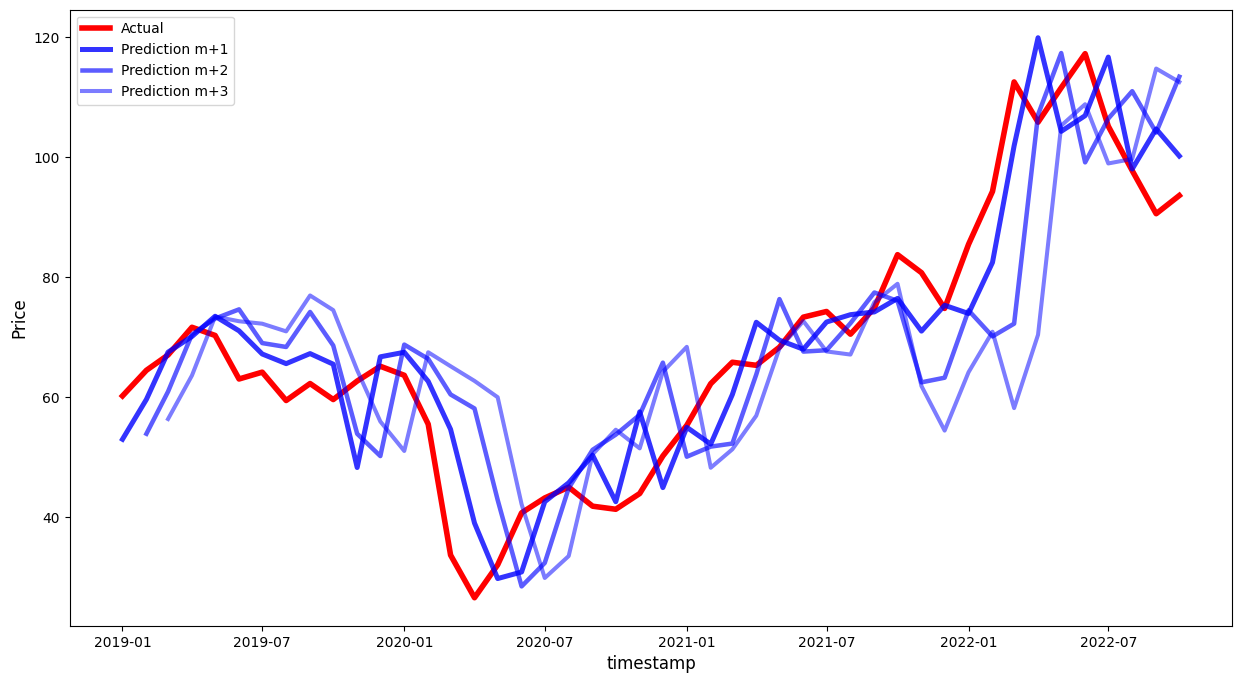

In [41]:
# plot of actual vs predicted
if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot = eval_df[(eval_df.month=='m+1')][['timestamp', 'actual']]
    for m in range(1, HORIZON+1):
        plot['m+'+str(m)] = eval_df[(eval_df.month=='m+'+str(m))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    plt.plot(plot['timestamp'], plot['actual'], color='red', linewidth=4.0, label='Actual')  # Add label here
    for m in range(1, HORIZON+1):
        x = plot['timestamp'][(m-1):]
        y = plot['m+'+str(m)][0:len(x)]
        plt.plot(x, y, color='blue', linewidth=4*math.pow(.9,m), alpha=math.pow(0.8,m), label='Prediction m+'+str(m))  # Add label here
    
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()  # Add this line to display the legend
plt.show()

In [42]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

if(HORIZON == 1):
    ## Plotting single step forecast
    fig.add_trace(go.Scatter(x=eval_df['timestamp'], y=eval_df['actual'], mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=eval_df['timestamp'], y=eval_df['prediction'], mode='lines', name='Prediction'))

else:
    ## Plotting multi step forecast
    plot = eval_df[(eval_df.month=='m+1')][['timestamp', 'actual']]
    for m in range(1, HORIZON+1):
        plot['m+'+str(m)] = eval_df[(eval_df.month=='m+'+str(m))]['prediction'].values

    fig.add_trace(go.Scatter(x=plot['timestamp'], y=plot['actual'], mode='lines', name='Actual'))
    for m in range(1, HORIZON+1):
        x = plot['timestamp'][(m-1):]
        y = plot['m+'+str(m)][0:len(x)]
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Prediction m+'+str(m)))

# Set the title and labels
fig.update_layout(title='Actual vs Predicted', xaxis_title='Timestamp', yaxis_title='Price', height=1000, width=1000)


# Show the figure
fig.show()